# Inside Recent Trends in the NFL
#### By Emily Blatt

This program examines patterns and trends in the National Football League over the 2010-2020 season. The main goal of this program is to help fans and coaches better understand trends in the NFL by examining the value of offensive and defensive ranking, overall offense trends, and teams' success history. This program uses three datasets: `NFL Team Defense Statistics.csv`, `NFL Team Offense Statistics.csv`, and `NFLteams.csv`. The program cleans the datasets to make them usable and then unites them to filter and make visuals of the data that can assess possible patterns. Lastly, this program creates a dashboard for users to explore this data further. The `NFL Team Defense Statistics.csv` is a CVS file that contains figures each team allowed to their opponents from the 2010-2020 seasons, like total rushing yards and total yards. The second database, the `NFL Team Offense Statistics.csv`, is a CVS file with overall offense statistics, including team rushing yardage, team passing yardage, and total team yardage during the 2010-2020 seasons. The last dataset `NFL teams.csv` a CVS file that contains each team's winning information from the 2002 to 2021 seasons.

### Step 1: Load Data 
The first step of this program is to load the data. I loaded each of the datasets and removed unnecessary columns to the goals of this project.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import stat 

# Loads Data 
defense = pd.read_csv( "NFL Team Defense Statistics.csv")

# Drop unneccessary columns
defense.drop(["Gms", "Pts/G", "RYds/G", "PYds/G", "Yds/G"],  axis=1, inplace=True)
defense

In [ ]:
# Loads Data 
offense = pd.read_csv ("NFL Team Offense Statistics.csv")

# Drop unneccessary columns
offense.drop(["Pts/G", "RYds/G", "PYds/G", "Yds/G" ],  axis=1, inplace=True)

offense

,season,Team,Gms,Tot Pts,RushYds,PassYds,TotYds,Ranking
0,2010,San Diego Chargers,16,441,1810,4519,6329,1
1,2010,Philadelphia Eagles,16,439,2324,3906,6230,2
2,2010,Houston Texans,16,390,2042,4144,6186,3
3,2010,Indianapolis Colts,16,435,1483,4609,6092,4
4,2010,New York Giants,16,394,2200,3885,6085,5
...,...,...,...,...,...,...,...,...
347,2020,Jacksonville Jaguars,16,306,1519,3699,5218,28
348,2020,Cincinnati Bengals,16,311,1668,3448,5116,29
349,2020,Washington Football Team,16,335,1611,3465,5076,30
350,2020,New York Giants,16,280,1768,3026,4794,31


In [ ]:
# Loads Data 
teamwins = pd.read_csv ("NFLteams.csv")

# Drop unneccessary columns
teamwins.drop(["conf", "division", "div_rank", "sov", "sos"],  axis=1, inplace=True)
teamwins

,season,team,wins,losses,ties,pct,scored,allowed,net,seed,playoff
0,2002,BUF,8,8,0,0.500000,379,397,-18,NaN,NaN
1,2002,MIA,9,7,0,0.562500,378,301,77,NaN,NaN
2,2002,NE,9,7,0,0.562500,381,346,35,NaN,NaN
3,2002,NYJ,9,7,0,0.562500,359,336,23,4.0,LostDV
4,2002,BAL,7,9,0,0.437500,316,354,-38,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
635,2021,TB,13,4,0,0.764706,511,353,158,2.0,LostDV
636,2021,ARI,11,6,0,0.647059,449,366,83,5.0,LostWC
637,2021,LA,12,5,0,0.705882,460,372,88,4.0,WonSB
638,2021,SEA,7,10,0,0.411765,395,366,29,NaN,NaN


### Step 2: Clean Data 
The next step is to clean the data to use the data in later steps easily. First, The `teamwins` dataframe needs to have the teams' full name displayed instead of the teams' abbreviation. Therefore, the abbreviations from `teamwins` dataframe are created into a list without duplicates in alphabetical, and the full name from `defense` dataframe is also created without duplicates in alphabetical. Then these two lists are combined into one dictionary. Lastly, the dictionary replaces the abbreviation with the whole team name.  

In [ ]:
df1 = teamwins['team']
df1 = df1.sort_values(ascending=True)
df1 = df1.drop_duplicates()
df2 = defense ['Team']
df2 = df2.sort_values(ascending=True)
df2 = df2.sort_values(ascending=True)
df2 = df2.drop_duplicates()
convert_abbreviation_to_name = dict( zip( df1, df2) )
teamwins.replace( convert_abbreviation_to_name, inplace=True )
convert_abbreviation_to_name
teamwins

,season,team,wins,losses,ties,pct,scored,allowed,net,seed,playoff
0,2002,Buffalo Bills,8,8,0,0.500000,379,397,-18,NaN,NaN
1,2002,Miami Dolphins,9,7,0,0.562500,378,301,77,NaN,NaN
2,2002,New England Patriots,9,7,0,0.562500,381,346,35,NaN,NaN
3,2002,New York Jets,9,7,0,0.562500,359,336,23,4.0,LostDV
4,2002,Baltimore Ravens,7,9,0,0.437500,316,354,-38,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
635,2021,Tampa Bay Buccaneers,13,4,0,0.764706,511,353,158,2.0,LostDV
636,2021,Arizona Cardinals,11,6,0,0.647059,449,366,83,5.0,LostWC
637,2021,Las Vegas Raiders,12,5,0,0.705882,460,372,88,4.0,WonSB
638,2021,San Francisco 49ers,7,10,0,0.411765,395,366,29,NaN,NaN


The `teamwins` dataframe should now have the full names of teams displayed in the team column.

The second problem of the data that needs to be fixed is that some of the teams have changed their names over the past 11 seasons. To fix this problem, I replace these name changing teams with their current names in both data frames of offense and defense.

In [ ]:
offense['Team'] = offense['Team'].replace(['San Diego Chargers'],'Los Angeles Chargers')
offense['Team'] = offense['Team'].replace(['Oakland Raiders'],'Las Vegas Raiders')
offense['Team'] = offense['Team'].replace(['St. Louis Rams'],'Los Angeles Rams')
defense['Team'] = defense['Team'].replace(['San Diego Chargers'],'Los Angeles Chargers')
defense['Team'] = defense['Team'].replace(['Oakland Raiders'],'Las Vegas Raiders')
defense['Team'] = defense['Team'].replace(['St. Louis Rams'],'Los Angeles Rams')
teamwins['team'] = teamwins['team'].replace(['San Diego Chargers'],'Los Angeles Chargers')
teamwins['team'] = teamwins['team'].replace(['Oakland Raiders'],'Las Vegas Raiders')
teamwins['team'] = teamwins['team'].replace(['St. Louis Rams'],'Los Angeles Rams')
teamwins

,season,team,wins,losses,ties,pct,scored,allowed,net,seed,playoff
0,2002,Buffalo Bills,8,8,0,0.500000,379,397,-18,NaN,NaN
1,2002,Miami Dolphins,9,7,0,0.562500,378,301,77,NaN,NaN
2,2002,New England Patriots,9,7,0,0.562500,381,346,35,NaN,NaN
3,2002,New York Jets,9,7,0,0.562500,359,336,23,4.0,LostDV
4,2002,Baltimore Ravens,7,9,0,0.437500,316,354,-38,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
635,2021,Tampa Bay Buccaneers,13,4,0,0.764706,511,353,158,2.0,LostDV
636,2021,Arizona Cardinals,11,6,0,0.647059,449,366,83,5.0,LostWC
637,2021,Las Vegas Raiders,12,5,0,0.705882,460,372,88,4.0,WonSB
638,2021,San Francisco 49ers,7,10,0,0.411765,395,366,29,NaN,NaN


The output should result in St. Louis Rams, Oakland Raiders, and San Diego Chargers not appearing in the data frames now but instead showing the current name of these teams.

### Step 3: Merge Data  
The next step is to merge the dataframes to have two dataframes, one for the offense information plus the winning information and another for the defense information plus the winning information. Finally, the data is merged into the columns of team and season. An inner merge is performed because I only want to examine seasons from 2010 to 2020 and do not want any missing values in the new dataframes.

In [ ]:
# Merges offense with teamwin using the columns of team and season that does not included any missing data. 
offenseWins = pd.merge(offense, teamwins,
    left_on=['Team','season '],
    right_on=['team','season'], how= "inner" )

# Drop repeating columns 
offenseWins.drop(["season", "team"],  axis=1, inplace=True)
offenseWins

,season,Team,Gms,Tot Pts,RushYds,PassYds,TotYds,Ranking,wins,losses,ties,pct,scored,allowed,net,seed,playoff
0,2010,Los Angeles Chargers,16,441,1810,4519,6329,1,9,7,0,0.56250,441,322,119,NaN,NaN
1,2010,Philadelphia Eagles,16,439,2324,3906,6230,2,10,6,0,0.62500,439,377,62,3.0,LostWC
2,2010,Houston Texans,16,390,2042,4144,6186,3,6,10,0,0.37500,390,427,-37,NaN,NaN
3,2010,Indianapolis Colts,16,435,1483,4609,6092,4,10,6,0,0.62500,435,388,47,3.0,LostWC
4,2010,New York Giants,16,394,2200,3885,6085,5,10,6,0,0.62500,394,347,47,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2020,Jacksonville Jaguars,16,306,1519,3699,5218,28,1,15,0,0.06250,306,492,-186,NaN,NaN
348,2020,Cincinnati Bengals,16,311,1668,3448,5116,29,4,11,1,0.28125,311,424,-113,NaN,NaN
349,2020,Washington Football Team,16,335,1611,3465,5076,30,7,9,0,0.43750,335,329,6,4.0,LostWC
350,2020,New York Giants,16,280,1768,3026,4794,31,6,10,0,0.37500,280,357,-77,NaN,NaN


In [ ]:
# Merges defense with teamwin using the columns of team and season that does not included any missing data. 
DefenseWins = pd.merge(defense, teamwins,
    left_on=['Team','season'],
    right_on=['team','season'], how = "inner" )

# Drop repeating columns     
DefenseWins.drop("team",  axis=1, inplace=True)
DefenseWins

,season,Team,Tot Pts,RushYds,PassYds,TotYds,Ranking,wins,losses,ties,pct,scored,allowed,net,seed,playoff
0,2010,Buffalo Bills,289,1866,2771,4637,1,4,12,0,0.2500,283,425,-142,NaN,NaN
1,2010,Carolina Panthers,404,1935,3266,5201,2,2,14,0,0.1250,196,408,-212,NaN,NaN
2,2010,San Francisco 49ers,365,1760,3510,5270,3,7,9,0,0.4375,310,407,-97,4.0,LostDV
3,2010,New England Patriots,303,2103,3181,5284,4,14,2,0,0.8750,518,313,205,1.0,LostDV
4,2010,Cleveland Browns,371,1857,3439,5296,5,5,11,0,0.3125,271,332,-61,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2020,Tennessee Titans,439,1933,4439,6372,28,11,5,0,0.6875,491,439,52,4.0,LostWC
348,2020,Atlanta Falcons,414,1677,4697,6374,29,4,12,0,0.2500,396,414,-18,NaN,NaN
349,2020,Houston Texans,464,2564,4104,6668,30,4,12,0,0.2500,384,464,-80,NaN,NaN
350,2020,Jacksonville Jaguars,492,2452,4231,6683,31,1,15,0,0.0625,306,492,-186,NaN,NaN


### Step 4: Cleaning Merged DataFramed 
After merging the dataframes, the data needs to be cleaned again to use in later steps easily. First, I want to list all the 32 teams for later use, so I drop all duplicates in the list created from the offenseWins column of teams.

In [ ]:
# Drop duplicates values of team so there is only 32 NFL teams in the list of teams
teams = offenseWins.Team.drop_duplicates()
len(teams)

32

The output should state that there are 32 items in the list of NFL teams called `teams`. 

Also, I want to create a list of each season contain the offensiveWin dataframe without duplicates so I drop all duplicates from the list created from the offensiveWin column of season.  

In [ ]:
# Drop duplicates values of season so there is an unique list of season from 2010-2020
season = offenseWins["season "].drop_duplicates()
len(season)

11

The output should stated that there is now 11 items in the list of seasons called `season`. 

The part of this step is to replace all the nan or missing values in the playoff column to say instead that they did not make the playoffs in both of the merged dataframes.

In [ ]:
# Replace nan in playoff column when team fail to make the playoffs in offenseWins and DefenseWins.
offenseWins['playoff'] = offenseWins['playoff'].fillna('Did not make the playoffs')
DefenseWins['playoff'] = DefenseWins['playoff'].fillna('Did not make the playoffs')
offenseWins

,season,Team,Gms,Tot Pts,RushYds,PassYds,TotYds,Ranking,wins,losses,ties,pct,scored,allowed,net,seed,playoff
0,2010,Los Angeles Chargers,16,441,1810,4519,6329,1,9,7,0,0.56250,441,322,119,NaN,Did not make the playoffs
1,2010,Philadelphia Eagles,16,439,2324,3906,6230,2,10,6,0,0.62500,439,377,62,3.0,LostWC
2,2010,Houston Texans,16,390,2042,4144,6186,3,6,10,0,0.37500,390,427,-37,NaN,Did not make the playoffs
3,2010,Indianapolis Colts,16,435,1483,4609,6092,4,10,6,0,0.62500,435,388,47,3.0,LostWC
4,2010,New York Giants,16,394,2200,3885,6085,5,10,6,0,0.62500,394,347,47,NaN,Did not make the playoffs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2020,Jacksonville Jaguars,16,306,1519,3699,5218,28,1,15,0,0.06250,306,492,-186,NaN,Did not make the playoffs
348,2020,Cincinnati Bengals,16,311,1668,3448,5116,29,4,11,1,0.28125,311,424,-113,NaN,Did not make the playoffs
349,2020,Washington Football Team,16,335,1611,3465,5076,30,7,9,0,0.43750,335,329,6,4.0,LostWC
350,2020,New York Giants,16,280,1768,3026,4794,31,6,10,0,0.37500,280,357,-77,NaN,Did not make the playoffs


In the offenseWin there should now be no missing values in the playoff column to check this step. 

### Step 5: Exploring the Data 
#### Question: Is having a top-ranked offense or defense more associated with making the playoff over the past 11 seasons? How often does the first ranked make it to the playoffs?

The first pattern that I want to find is if the 1st ranked defensive or offensive is more likely to make it to the playoffs. To answer this question, I want to filter through my data to understand the number of times that the top-ranking defense and offense have made it to the playoffs over the past 11 seasons. 

In [ ]:
topdefense = DefenseWins[(DefenseWins.Ranking == 1)]
topPlayoffDefense = topdefense.dropna(subset=["seed","playoff"])
len(topPlayoffDefense)

7

Using the lens function, we can see that from the 2010-2020 seasons, only seven top-ranked defenses made it to the playoffs.

Now, I do the same for the defense data to the offense data to compare the number of playoffs over the past 11 seasons. 

In [ ]:
topOffense = offenseWins[(offenseWins.Ranking == 1)]
topPlayoffOffense = topOffense.dropna(subset=["seed","playoff"])
len(topPlayoffOffense)

7

Using the lens function, we can see that from the 2010-2020 seasons, seven top-ranked offenses made it to the playoffs. According to the data, the top-ranked offense made it to the playoffs same time as the top-ranked defense.

#### Question: How often do the top-ranked offense and defense make it to the Super Bowl and win? 

Since top likely ranked defensive and offense give a similar amount of tripd for their team to make into the playoffs, I now want to understand if one of them makes their team more likely to make it to the Superbowl and win. To do this, I need to filter the data to only look at data that has the playoff equal to "WonSB" or "LossSB." So, I first filter the data from the defense perspective. 

In [ ]:
superbowltopDefense = topPlayoffDefense[(topPlayoffDefense.playoff == "WonSB") | (topPlayoffDefense.playoff == "LostSB") ]
superbowltopDefense

,season,Team,Tot Pts,RushYds,PassYds,TotYds,Ranking,wins,losses,ties,pct,scored,allowed,net,seed,playoff
160,2015,Denver Broncos,296,1337,3193,4530,1,12,4,0,0.75,355,296,59,1.0,WonSB


From filtering the data to see that the top-ranked defense has won the Superbowl once over the past 11 seasons. The output displays that only the 2015 Denver Broncos had the 1st ranked defense and won the Superbowl. 

Next, I repeat the steps above but for the offense data. 

In [ ]:
superbowltopOffense = topPlayoffOffense[(topPlayoffOffense.playoff == "WonSB")| (topPlayoffOffense.playoff == "LostSB")]
superbowltopOffense

,season,Team,Gms,Tot Pts,RushYds,PassYds,TotYds,Ranking,wins,losses,ties,pct,scored,allowed,net,seed,playoff
96,2013,Denver Broncos,16,606,1873,5444,7317,1,13,3,0,0.8125,606,399,207,1.0,LostSB
224,2017,New England Patriots,16,458,1889,4418,6307,1,13,3,0,0.8125,458,296,162,1.0,LostSB
320,2020,Kansas City Chiefs,16,473,1799,4854,6653,1,14,2,0,0.8750,473,362,111,1.0,LostSB


The output shows that three top-ranked offenses made it to the Super Bowl, but none won it. Therefore, the data indicate that top-ranked offenses in the past 11 seasons are more likely to make it to the Superbowl, but that does not mean they are more likely to win the Superbowl. Our data is too few seasons to fully understand and conclude if the 1st ranked offensive or defense is more valuable to teams in winning playoffs games and becoming Superbowl Champions. 

#### Question: What is the average ranked offensive that wins the Superbowl and the average ranked defensive that wins the Superbowl? 

The next question I want to investigate is finding the average rank of offenses and defenses that has won the Superbowl from 2010-to 2020. As seen in the previous question, the top-ranked offense or defense rarely wins the Superbowl. This result led me to wonder about the average rank of SuperBowl champs from the 2010-2020 seasons. To find this answer, I first loop through offenseWins dataframe to collect all the offensive rankings of teams that have won the Superbowl from 2010-to 2020. Then, I took the average of that list to find the average offense rank of the Superbowl champs. 

In [ ]:
import statistics
offenseRankingList = []
for index,row in offenseWins.iterrows():
    if row["playoff"]== 'WonSB':
        offenseRankingList.append(row['Ranking'])
statistics.mean(offenseRankingList)

10.272727272727273

The data shows that the average offensive rank of SuperBowl champions from the range of the data is 10.3

Next, I repeat the step above but for the defense ranking instead to compare the averages. 

In [ ]:
defenseRankingList = []
for index,row in DefenseWins.iterrows():
    if row["playoff"]== 'WonSB':
        defenseRankingList.append(row['Ranking'])
statistics.mean(defenseRankingList)

11.636363636363637

According to the data, the average defensive rank of Superbowl champs from the 2010-2020 season is 11.6. The average defensive rank is higher than the offensive rank, but these averages are not close to being the top five rank offense or defense. This means that a team does not need to have the best offense or defense during the season to make or win the Superbowl. 

#### Question: What are the offensive trends in the NFL from 2010 to 2020?

The next question that I want to explore is the offensive trends in NFL over the 11 seasons from the data. To find patterns displaying offensive trends, I create graphs of total rushing yards and the total passing yards over the 11 seasons. Firstly, I need to list all the rushing yards for each season and then combine these 11 seasons into a single list with all the averages from each season. Then, I zip this list with the season to create a dictionary. Finally, I used this dictionary to create the bar graph of the average rushing yards for each season. 

In [ ]:
import statistics
RushData2010 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2010 :
                RushData2010.append(row['RushYds'])
RushData2011 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2011 :
                RushData2011.append(row['RushYds'])
RushData2012 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2012 :
                RushData2012.append(row['RushYds'])
RushData2013 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2013 :
                RushData2013.append(row['RushYds'])
RushData2014 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2014 :
                RushData2014.append(row['RushYds'])
RushData2015 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2015 :
                RushData2015.append(row['RushYds'])
RushData2016 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2016 :
                RushData2016.append(row['RushYds'])
RushData2017 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2017 :
                RushData2017.append(row['RushYds'])
RushData2018 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2018 :
                RushData2018.append(row['RushYds'])
RushData2019 =[]
for index,row in offenseWins.iterrows():
            if row["season "] == 2019 :
                RushData2019.append(row['RushYds'])
RushData2020 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2020 :
                RushData2020.append(row['RushYds'])               
RushingData= [statistics.mean(RushData2010), statistics.mean(RushData2011), statistics.mean(RushData2012), statistics.mean(RushData2013), statistics.mean(RushData2014), statistics.mean(RushData2015), statistics.mean(RushData2016), statistics.mean(RushData2017), statistics.mean(RushData2018), statistics.mean(RushData2019), statistics.mean(RushData2020)]
seasonavgRushing = dict(zip(season, RushingData))
seasonavgRushing

{2010: 1831.46875,
 2011: 1874.3125,
 2012: 1854.65625,
 2013: 1806.09375,
 2014: 1781.3125,
 2015: 1741.375,
 2016: 1763.53125,
 2017: 1742.90625,
 2018: 1812.3125,
 2019: 1818.75,
 2020: 1902.125}

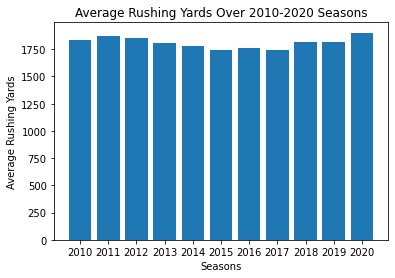

In [ ]:
plt.figure()
names = list(seasonavgRushing.keys())
values = list(seasonavgRushing.values())
plt.xlabel('Seasons')
plt.ylabel('Average Rushing Yards')
plt.title("Average Rushing Yards Over 2010-2020 Seasons")
plt.bar(range(len(seasonavgRushing)), values, tick_label=names)
plt.show()

The graph displays that in the recent season of 2018 to 2020, there was an increase in the total rushing yard in NFL. Also, the graph shows that from 2011 to 2015, there was a trend of decreasing the amount of rushing yards.  

Next, I created a similar bar graph for passing yards. Like in the previous step, I make 11 eleven lists, but for passing yards this time. Then, I combined these 11 seasons into a single list with all the averages from each season. Next, I zip this list with the season to create a dictionary. Finally, I used this dictionary to create the bar graph of the average passing yards for each season.

In [ ]:
import statistics
PassData2010 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2010 :
                PassData2010.append(row['PassYds'])
PassData2011 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2011 :
                PassData2011.append(row['PassYds'])
PassData2012 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2012 :
                PassData2012.append(row['PassYds'])
PassData2013 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2013 :
                PassData2013.append(row['PassYds'])
PassData2014 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2014 :
                PassData2014.append(row['PassYds'])
PassData2015 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2015 :
                PassData2015.append(row['PassYds'])
PassData2016 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2016 :
                PassData2016.append(row['PassYds'])
PassData2017 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2017 :
                PassData2017.append(row['PassYds'])
PassData2018 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2018 :
                PassData2018.append(row['PassYds'])
PassData2019 =[]
for index,row in offenseWins.iterrows():
            if row["season "] == 2019 :
                PassData2019.append(row['PassYds'])
PassData2020 = []
for index,row in offenseWins.iterrows():
            if row["season "] == 2020 :
                PassData2020.append(row['PassYds'])
PassingData= [statistics.mean(PassData2010), statistics.mean(PassData2011), statistics.mean(PassData2012), statistics.mean(PassData2013), statistics.mean(PassData2014), statistics.mean(PassData2015), statistics.mean(PassData2016), statistics.mean(PassData2017), statistics.mean(PassData2018), statistics.mean(PassData2019), statistics.mean(PassData2020)]
seasonavgpassing = dict(zip(season, PassingData))
seasonavgpassing

{2010: 3544.75,
 2011: 3675.03125,
 2012: 3700.5625,
 2013: 3769.78125,
 2014: 3788.96875,
 2015: 3901.125,
 2016: 3898.09375,
 2017: 3583.4375,
 2018: 3780.65625,
 2019: 3741.5,
 2020: 3842.40625}

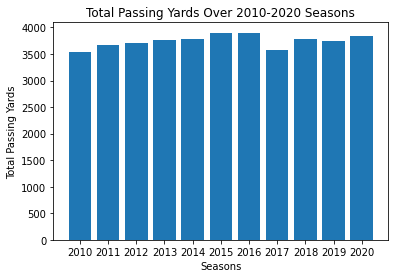

In [ ]:
plt.figure()
names = list(seasonavgpassing.keys())
Passingvalues = list(seasonavgpassing.values())
plt.xlabel('Seasons')
plt.ylabel('Total Passing Yards')
plt.title("Total Passing Yards Over 2010-2020 Seasons")
plt.bar(range(len(seasonavgpassing)), Passingvalues, tick_label=names)
plt.show()

The graph displays an increase in passing yards from the 2010 to 2016 seasons, and in recent seasons of 2019 and 2020, the passing yards stay relatively the same, around 3,750 yards. 

#### Question: Over the past 11 seasons, which teams have won the most?
The last part of the data that I want to examine is each team's history and which teams have been successful and have struggled over the past 11 seasons. To explore this question, I need to create a series called `winsperTeam` grouped by each team with their total wins from the past 11 seasons.

In [ ]:
winsperTeam = offenseWins.groupby("Team")['wins'].sum()
winsperTeam

Team
Arizona Cardinals            83
Atlanta Falcons              93
Baltimore Ravens            109
Buffalo Bills                84
Carolina Panthers            83
Chicago Bears                84
Cincinnati Bengals           81
Cleveland Browns             53
Dallas Cowboys               92
Denver Broncos               94
Detroit Lions                77
Green Bay Packers           115
Houston Texans               86
Indianapolis Colts           93
Jacksonville Jaguars         52
Kansas City Chiefs          110
Las Vegas Raiders           110
Los Angeles Chargers         84
Los Angeles Rams             44
Miami Dolphins               80
Minnesota Vikings            88
New England Patriots        132
New Orleans Saints          112
New York Giants              76
New York Jets                70
Philadelphia Eagles          91
Pittsburgh Steelers         114
San Francisco 49ers         112
Seattle Seahawks             86
Tampa Bay Buccaneers         70
Tennessee Titans             80
Was

The output should create a series with each team in one column and their total wins in another column. 

After creating this series, I made a pie chart of the teams' total wins to see if any team's amount of wins stood out. 

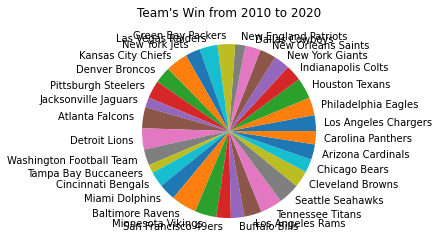

In [ ]:
plt.figure()
plt.pie(winsperTeam, labels=teams)
plt.title("Team's Win from 2010 to 2020")
plt.show()

The pie chart displayed that most team has a relatively equal percentage of the total wins. Some are less noticeable than the other team, the Jacksonville Jaguars, Cleveland Browns, and Los Angeles Rams. However, this pie chart does not tells which team has won the most and least in the 11 seasons looked at from the data. 

To find the definite answer of the most winnest team from 2010 to 20202, I created a variable called `Mostwins` that find the max value in the `winsperTeam` series. Next, I created a list from a for loop that finds items in the series equal to the max value of wins. 

In [ ]:
Mostwins = winsperTeam.max()
Winnestteam = [key for key, value in winsperTeam.items() if value == Mostwins]
Mostwins, Winnestteam

(132, ['New England Patriots'])

The team that has won the most games over the 2010 to 2020 seasons is the New England Patriots, with 132 wins. 

In [ ]:
Leastwins = winsperTeam.min()
LoserTeams = [key for key, value in winsperTeam.items() if value == Leastwins]
Leastwins, LoserTeams

(44, ['Los Angeles Rams'])

The team that has won the least games over the 2010 to 2020 seasons is the Los Angeles Rams, with 44 wins.

### Step 6: Dashboard 
The last task of this program is to create an interactive dashboard for users to explore the data further. The dashboard allows users to examine data through the inputs of a specific NFL Team and by a particular season. This dashboard will enable users to gain more insight into the team's trends and seasons results like total wins, SuperBowl champs, and top ten offense and defense. The link to the dashboard is created below and uses code in `streamlit_app.py` to make the app. 

In [ ]:
from IPython.display import HTML
import os

display( HTML( f'<h2><a href="http://{os.environ["DEEPNOTE_PROJECT_ID"]}.deepnoteproject.com" target="_blank">Click here to open your Streamlit app.</a></h2>' ) )

This code below pushing the work done above to GitHub.

In [ ]:
# This records the name of your git folder for use in code later in this notebook.
%env MA346FinalProject MA346FinalProject

env: MA346FinalProject=MA346FinalProject


In [ ]:
# This copies the latest version of all your files into the folder for syncing with GitHub:
!cp *.* "$MA346FinalProject/"

# This commits those changes and pushes them to GitHub:
!cd "$MA346FinalProject/" && git add -A && git commit -m '2' && git push

[master 069b01b] 2
 Committer: root <root@p-0ddb3e5f-34f6-4a5d-a113-53c22ace5185.projects-domain.projects.svc.cluster.local>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly. Run the
following command and follow the instructions in your editor to edit
your configuration file:

    git config --global --edit

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 2 files changed, 370 insertions(+), 1399 deletions(-)
 rewrite init.ipynb (77%)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 6.03 KiB | 686.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/eblatt15/MA346FinalProje

In [ ]:
!streamlit run streamlit_app.py --server.port=8080 --server.address='0.0.0.0'


  You can now view your Streamlit app in your browser.

  URL: http://0.0.0.0:8080

^C
  Stopping...


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0ddb3e5f-34f6-4a5d-a113-53c22ace5185' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>